In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from queue import PriorityQueue
import copy
import sys

In [42]:
G = nx.read_edgelist("input50_sparse.txt", nodetype=int, data=(("weight", int),))
G = nx.Graph(G)
lst = []
for s, d, wt in G.edges(data=True):
    wt = wt.get('weight')
    e = (s, d, wt)
    if wt == 0:
        lst.append(e)

for i in lst:
    G.remove_edge(*i[:2])

In [43]:
list(G.edges(data=True))
source = list(G.edges())
source, x = source[0]
print("source is " + str(source))

source is 1


In [44]:
def print_graph(inp_graph, ct):
    pos = nx.spring_layout(inp_graph)
    nx.draw_networkx(inp_graph, pos)
    labels = nx.get_edge_attributes(inp_graph, 'weight')
    x = nx.draw_networkx_edge_labels(inp_graph, pos, edge_labels=labels)
    plt.show("filename" + str(ct) + ".png")

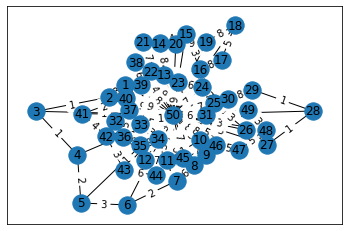

In [45]:
# Initialize
input_graph = copy.deepcopy(G)
print_graph(input_graph, 0)
no_of_nodes = input_graph.number_of_nodes()
# heap = [] # store as (node, g-value)
pq = PriorityQueue()

In [46]:
print("No of nodes in graph " + str(input_graph.number_of_nodes()))
# print_graph(input_graph, 0)

No of nodes in graph 50


In [47]:
def kruskalAlgo(inp_graph):
    # stores the edges present in MST
    MST = []
    index = 0
    cost = 0
    nodes = inp_graph.number_of_nodes()
    # temp graph
    graph = nx.Graph()
    # sort edges by increasing weight
    sorted_graph = sorted(inp_graph.edges(data=True), key=lambda item: item[2]['weight'])
    # MST contains exactly `V-1` edges
    i = 0
    for edgelist in sorted_graph:
        # consider the next edge with minimum weight from the graph
        (src, dest, weight) = edgelist
        weight = weight.get('weight')
        index = index + 1
        # add edge
        graph.add_edge(src, dest, weight=weight)
        # check for cycle
        lst = nx.cycle_basis(graph.to_undirected())
        if len(lst) == 0:
            # consider the wt if no cycle
            cost = cost + weight
        else:
            # discard the edge
            e = (src, dest, {"weight" : weight})
            graph.remove_edge(*e[:2])
    cost = 0
    for s,d,wt in graph.edges(data="weight"):
        cost = cost + wt
    # print(cost)
    return graph, cost

In [48]:
#works
def get_g_n(inp_graph, src, dest, parent_g_n):
    e = (src, dest)
    if inp_graph.has_edge(*e):
        return inp_graph[src][dest].get('weight') + parent_g_n
    else:
        return -1

In [49]:
#works
def get_h_n_and_mst(inp_graph):
    graph, cost = kruskalAlgo(inp_graph)
    # print("Cost of MST " + str(cost))
    # print_graph(graph,0)
    return cost

In [50]:
#works
def remove_list_of_nodes_from_graph(src, inp_graph, lst):
    # lst = visited + [u]
    for i in lst:
        if int(i) != src:
            if int(i) in inp_graph:
                inp_graph.remove_node(int(i))
    return inp_graph

In [51]:
#works
def goal_test(input_graph ,visited):
    lst = list(input_graph)
    for i in lst:
        if i not in visited:
            return False
    return True

In [52]:
def A_star(inp_graph, N, src):
    # flag
    flag = 0
    # var
    popped = 0
    # ans
    ans = 0
    # state
    count = 0
    # GN
    GN = 0
    # ct = []
    visited = []
    # deepcopy for aug graph
    temp = copy.deepcopy(inp_graph)

    h_n = get_h_n_and_mst(temp)
    # h_n = 0
    pq.put((h_n + GN, h_n, GN, src, copy.deepcopy(visited), src))
    # std bfs jaisa
    while pq.qsize() != 0:
        count = max(pq.qsize(), count)
        data = pq.get()
        f_n_parent, h_n_parent, g_n_parent, node, visited, parent = data
        ans = f_n_parent
        popped = node
        # make node lst
        visited.append(node)
        # print("-----------------------------------------------------------------")
        if goal_test(inp_graph , visited):
            # count = len(list(heap))
            print("Goal test ran once " + str(visited + [src]))
            # print(visited[len(visited) -1])
            x = visited[len(visited) -1]
            e = (x, src)
            if not inp_graph.has_edge(*e):
                print("No direct edges between " + str(x) + " and " + str(src))
                print("Prune above path :)")
                continue
            else:
                ans += inp_graph[visited[len(visited)-1]][src].get('weight')
                return ans, count
        # get edges of current node
        edges = []
        for u, v, weight in inp_graph.edges.data("weight"):
            if weight is not None:
                if u == node and v not in visited:
                    edges.append(v)
                elif v == node and u not in visited:
                    edges.append(u)
        # push all those childs into heap
        for u in edges:
            # deepcopy for aug graph
            temp = copy.deepcopy(inp_graph)
            # create augmented graph
            temp = remove_list_of_nodes_from_graph(src, temp, visited + [u])
            # generate MST of augmented graph
            h_n = get_h_n_and_mst(temp)
            # edge wt + parent's gn
            GN = get_g_n(inp_graph, node, u, g_n_parent)
            
            if GN == -1:
                print("Direct edge doesn't exist for " + str(u) + " and " + str(node))
                break
            # push into heap
            pq.put((h_n + GN, h_n, GN, u, copy.deepcopy(visited),node))
        
    if pq.qsize() == 0:
        # print("We haven't traversed all nodes and heap is empty")
        print("Solution does not exist")
        print("Fail")
        ans = 0
    return ans, count

In [53]:
def Start_a_star():
    temp = copy.deepcopy(input_graph)
    print_graph(input_graph, 0)
    path, count = A_star(input_graph, no_of_nodes, source)    
    print("FN = " + str(path))
    print("Max size of heap during runtime = " + str(count))

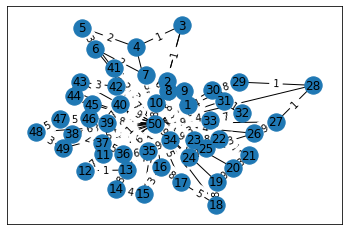

Goal test ran once [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 50, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 1]
No direct edges between 49 and 1
Prune above path :)
Goal test ran once [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 1]
No direct edges between 19 and 1
Prune above path :)
Goal test ran once [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 50, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 1]
No direct edges between 49 and 1
Prune above path :)
Goal test ran once [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 

KeyboardInterrupt: 

In [54]:
Start_a_star()